# 1.0 Classification Problem using decision tree classifier

##1.1 Dataset description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

<center>
  <figure>
    <img width="500" src="https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg">
  </figure>
  <figcaption>Fig.1 - Prima indian</figcaption>
</center>


###1.1.1 Glucose Tolerance Test

It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.

**Normal Results for Diabetes**: Two-hour glucose level less than 140 mg/dL

**Impaired Results for Diabetes** Two-hour glucose level 140 to 200 mg/dL

**Abnormal (Diagnostic) Results for Diabetes** Two-hour glucose level greater than 200 mg/dL


###1.1.2 Blood Pressure

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

**Normal**: Systolic below 120 and diastolic below 80

**Elevated**: Systolic 120–129 and diastolic under 80

**Hypertension stage 1**: Systolic 130–139 and diastolic 80–89

**Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more

**Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.


###1.1.3 BMI (Body Mass Index)

<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.4/MathJax.js?config=default'></script>

The BMI value is found by: 
$$ {BMI = weight/height²} $$

The standard weight status categories associated with BMI ranges for adults are shown below.

**Below 18.5**: Underweight

**18.5 – 24.9**: Normal or Healthy Weight

**25.0 – 29.9**: Overweight

**30.0 and Above**: Obese


###1.1.4 Triceps Skinfolds

For an adult woman, the standard normal values for triceps skinfolds is 18.0mm

##1.2 Install and load libraries

In [1]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 49.1 MB/s 
     |████████████████████████████████| 145 kB 37.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=5f9785b50dc9b0cacc88cb86fde9c16c78d4282ca09024c37d41b910bd7de553
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [2]:
import logging
import wandb
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


##1.3 Holdout Configuration


In [6]:
# global variables

# ratio used to split train and validation data
val_size = 0.30

# seed used to reproduce purposes
seed = 41

# reference (column) to stratify the data
stratify = "Outcome"

# name of the input artifact
artifact_input_name = "diabetes_decision_tree/train.csv:latest"

# type of the artifact
artifact_type = "Train"

In [8]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate the wandb project
run = wandb.init(project="diabetes_decision_tree",job_type="train")

logger.info("Downloading and reading train artifact")
local_path = run.use_artifact(artifact_input_name).file()
df_train = pd.read_csv(local_path)

# Spliting train.csv into train and validation dataset
logger.info("Spliting data into train/val")
# split-out train/validation and test dataset
x_train, x_val, y_train, y_val = train_test_split(df_train.drop(labels=stratify,axis=1),
                                                  df_train[stratify],
                                                  test_size=val_size,
                                                  random_state=seed,
                                                  shuffle=True,
                                                  stratify=df_train[stratify])

23-05-2022 11:24:51 Downloading and reading train artifact
23-05-2022 11:24:52 Spliting data into train/val


In [9]:
logger.info("x train: {}".format(x_train.shape))
logger.info("y train: {}".format(y_train.shape))
logger.info("x val: {}".format(x_val.shape))
logger.info("y val: {}".format(y_val.shape))

23-05-2022 11:24:58 x train: (375, 8)
23-05-2022 11:24:58 y train: (375,)
23-05-2022 11:24:58 x val: (162, 8)
23-05-2022 11:24:58 y val: (162,)


##1.4 Data preparation

Data preparation may be the most important part of a machine learning project.

It is the most time-consuming part, although it seems to be the least discussed topic.

Data preparation sometimes referred to as data preprocessing, is the act of transforming raw data into a form that is appropriate for modeling.

Machine learning algorithms require input data to be numbered, and most algorithm implementations maintain this expectation. As such, if your data contains data types and values that are not numbers, such as labels, you will need to change the data into numbers. Further, specific machine learning algorithms have expectations regarding the data types, scale, probability distribution, and relationships between input variables, and you may need to change the data to meet these expectations.

The philosophy of data preparation is to discover how to best expose the unknown underlying structure of the problem to the learning algorithms. This often requires an iterative path of experimentation through a suite of different data preparation techniques in order to discover what works well or best. The vast majority of the machine learning algorithms you may use on a project are years to decades old. The implementation and application of the algorithms are well understood. So much so that they are routine, with amazing, fully-featured open-source machine learning libraries like scikit-learn in Python.

The thing that is different from project to project is the data.
You may be the first person (ever!) to use a specific dataset as the basis for a predictive modeling project. As such, the preparation of the data in order to best present it to the problem of the learning algorithms is the primary task of any modern machine learning project.

The challenge of data preparation is that each dataset is unique and different.
Datasets differ in the number of variables (tens, hundreds, thousands, or more), the types of the variables (numeric, nominal, ordinal, boolean), the scale of the variables, the drift in the values over time, and more. As such, this makes discussing data preparation a challenge. Either specific case studies are used, or focus is put on the general methods that can be used across projects. The result is that neither approach is explored.

###1.4.1 Outlier removal

In [10]:
logger.info("Outlier Removal")
# temporary variable
x = x_train.select_dtypes("int64").copy()
x = x.join(x_train.select_dtypes("float64").copy())

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

23-05-2022 11:25:07 Outlier Removal


In [11]:
logger.info("x_train shape [original]: {}".format(x_train.shape))
logger.info("x_train shape [outlier removal]: {}".format(x_train.loc[mask,:].shape))

23-05-2022 11:25:08 x_train shape [original]: (375, 8)
23-05-2022 11:25:08 x_train shape [outlier removal]: (346, 8)


In [12]:
# AVOID data leakage and you should not do this procedure in the preprocessing stage
# Note that we did not perform this procedure in the validation set
x_train = x_train.loc[mask,:].copy()
y_train = y_train[mask].copy()

###1.4.2 Encoding Target Variable (not necessary for diabetes dataset)

In [13]:
y_train.head(10)

284    0
412    0
266    0
258    0
109    0
414    0
194    0
438    1
187    1
471    0
Name: Outcome, dtype: int64

In [14]:
logger.info("Encoding Target Variable")
# define a categorical encoding for target variable
le = LabelEncoder()

# fit and transform y_train
y_train = le.fit_transform(y_train)

# transform y_test (avoiding data leakage)
y_val = le.transform(y_val)

logger.info("Classes [0, 1]: {}".format(le.inverse_transform([0, 1])))

23-05-2022 11:25:14 Encoding Target Variable
23-05-2022 11:25:14 Classes [0, 1]: [0 1]


In [15]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [16]:
y_val

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

###1.4.3 Encoding independent variables (not necessary for diabetes dataset)

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
284,0,147,85,54,0,42.8,0.375,24
412,8,107,80,0,0,24.6,0.856,34
266,1,88,62,24,44,29.9,0.422,23
258,3,148,66,25,0,32.5,0.256,22
109,10,162,84,0,0,27.7,0.182,54


In [18]:
x_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
300,10,115,0,0,0,0.0,0.261,30
158,6,91,0,0,0,29.8,0.501,31
307,4,116,72,12,87,22.1,0.463,37
32,5,115,98,0,0,52.9,0.209,28
116,2,114,68,22,0,28.7,0.092,25


### Dont execute

In [ ]:
# just an experimentation

# drop=first erase redundant column
onehot = OneHotEncoder(sparse=False,drop="first")

# fit using x_train
onehot.fit(x_train["New_BMI_Range"].values.reshape(-1,1))

# make a copy
x_train_aux = x_train.copy()

# transform train 
x_train_aux[onehot.get_feature_names_out()] = onehot.transform(x_train_aux["New_BMI_Range"].values.reshape(-1,1))
x_train_aux.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Range,New_Glucose_Class,New_BloodPressure,x0_Obese,x0_Overweight,x0_Underweight
284,0,147,85,54,0,42.8,0.375,24,Obese,Prediabetes,HS1,1.0,0.0,0.0
412,8,107,80,0,0,24.6,0.856,34,Healty,Normal,HS1,0.0,0.0,0.0
266,1,88,62,24,44,29.9,0.422,23,Obese,Normal,Normal,1.0,0.0,0.0
258,3,148,66,25,0,32.5,0.256,22,Obese,Prediabetes,Normal,1.0,0.0,0.0
109,10,162,84,0,0,27.7,0.182,54,Overweight,Prediabetes,HS1,0.0,1.0,0.0


In [ ]:
# Inverse transformation
onehot.inverse_transform(np.array([0,1]).reshape(-1,1))

In [ ]:
# Inverse transformation (other way)
onehot.inverse_transform([[0],[1]])

In [ ]:
# Return the name of the new feature
onehot.get_feature_names_out()

array(['x0_Obese', 'x0_Overweight', 'x0_Underweight'], dtype=object)

###1.4.4 Encoding independent variable (not necessary for diabetes dataset)

In [19]:
x_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [20]:
# Show the shape of x train before transformation
x_train.shape

(346, 8)

In [21]:
# Lets review what are categorical columns
x_train.select_dtypes("object").columns.to_list()


[]

In [22]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
284,0,147,85,54,0,42.8,0.375,24
412,8,107,80,0,0,24.6,0.856,34
266,1,88,62,24,44,29.9,0.422,23
258,3,148,66,25,0,32.5,0.256,22
109,10,162,84,0,0,27.7,0.182,54


In [23]:
x_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
300,10,115,0,0,0,0.0,0.261,30
158,6,91,0,0,0,29.8,0.501,31
307,4,116,72,12,87,22.1,0.463,37
32,5,115,98,0,0,52.9,0.209,28
116,2,114,68,22,0,28.7,0.092,25


### Dont execute

In [ ]:
# 08 columns are "object", lets transform them to categorical 
for name in x_train.select_dtypes("object").columns.to_list():
    onehot = OneHotEncoder(sparse=False,drop="first")
    # fit using x_train
    onehot.fit(x_train[name].values.reshape(-1,1))

    # transform train and validation
    x_train[onehot.get_feature_names_out()] = onehot.transform(x_train[name].values.reshape(-1,1))
    x_val[onehot.get_feature_names_out()] = onehot.transform(x_val[name].values.reshape(-1,1))

In [ ]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Range,New_Glucose_Class,New_BloodPressure,x0_Obese,x0_Overweight,x0_Underweight,x0_Prediabetes,x0_HS2,x0_Normal
284,0,147,85,54,0,42.8,0.375,24,Obese,Prediabetes,HS1,1.0,0.0,0.0,1.0,0.0,0.0
412,8,107,80,0,0,24.6,0.856,34,Healty,Normal,HS1,0.0,0.0,0.0,0.0,0.0,0.0
266,1,88,62,24,44,29.9,0.422,23,Obese,Normal,Normal,1.0,0.0,0.0,0.0,0.0,1.0
258,3,148,66,25,0,32.5,0.256,22,Obese,Prediabetes,Normal,1.0,0.0,0.0,1.0,0.0,1.0
109,10,162,84,0,0,27.7,0.182,54,Overweight,Prediabetes,HS1,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Range,New_Glucose_Class,New_BloodPressure,x0_Obese,x0_Overweight,x0_Underweight,x0_Prediabetes,x0_HS2,x0_Normal
300,10,115,0,0,0,0.0,0.261,30,Underweight,Normal,Normal,0.0,0.0,1.0,0.0,0.0,1.0
158,6,91,0,0,0,29.8,0.501,31,Overweight,Normal,Normal,0.0,1.0,0.0,0.0,0.0,1.0
307,4,116,72,12,87,22.1,0.463,37,Healty,Normal,Normal,0.0,0.0,0.0,0.0,0.0,1.0
32,5,115,98,0,0,52.9,0.209,28,Obese,Normal,HS2,1.0,0.0,0.0,0.0,1.0,0.0
116,2,114,68,22,0,28.7,0.092,25,Overweight,Normal,Normal,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
cols=['New_BMI_Range','New_Glucose_Class','New_BloodPressure']

In [ ]:
x_train.drop(labels=cols,axis=1,inplace=True)
x_val.drop(labels=cols,axis=1,inplace=True)

In [ ]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x0_Obese,x0_Overweight,x0_Underweight,x0_Prediabetes,x0_HS2,x0_Normal
284,0,147,85,54,0,42.8,0.375,24,1.0,0.0,0.0,1.0,0.0,0.0
412,8,107,80,0,0,24.6,0.856,34,0.0,0.0,0.0,0.0,0.0,0.0
266,1,88,62,24,44,29.9,0.422,23,1.0,0.0,0.0,0.0,0.0,1.0
258,3,148,66,25,0,32.5,0.256,22,1.0,0.0,0.0,1.0,0.0,1.0
109,10,162,84,0,0,27.7,0.182,54,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x0_Obese,x0_Overweight,x0_Underweight,x0_Prediabetes,x0_HS2,x0_Normal
300,10,115,0,0,0,0.0,0.261,30,0.0,0.0,1.0,0.0,0.0,1.0
158,6,91,0,0,0,29.8,0.501,31,0.0,1.0,0.0,0.0,0.0,1.0
307,4,116,72,12,87,22.1,0.463,37,0.0,0.0,0.0,0.0,0.0,1.0
32,5,115,98,0,0,52.9,0.209,28,1.0,0.0,0.0,0.0,1.0,0.0
116,2,114,68,22,0,28.7,0.092,25,0.0,1.0,0.0,0.0,0.0,1.0


### run finish

In [24]:
# close the current run before to execute the next section
run.finish()

###1.4.5 Using full-pipeline

#### runing 1.3 again

In [109]:
# global variables

# ratio used to split train and validation data
val_size = 0.30

# seed used to reproduce purposes
seed = 41

# reference (column) to stratify the data
stratify = "Outcome"

# name of the input artifact
artifact_input_name = "diabetes_decision_tree/train.csv:latest"

# type of the artifact
artifact_type = "Train"

In [110]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate the wandb project
run = wandb.init(project="diabetes_decision_tree",job_type="train")

logger.info("Downloading and reading train artifact")
local_path = run.use_artifact(artifact_input_name).file()
df_train = pd.read_csv(local_path)

# Spliting train.csv into train and validation dataset
logger.info("Spliting data into train/val")
# split-out train/validation and test dataset
x_train, x_val, y_train, y_val = train_test_split(df_train.drop(labels=stratify,axis=1),
                                                  df_train[stratify],
                                                  test_size=val_size,
                                                  random_state=seed,
                                                  shuffle=True,
                                                  stratify=df_train[stratify])

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


23-05-2022 12:10:09 Downloading and reading train artifact
23-05-2022 12:10:10 Spliting data into train/val


In [111]:
logger.info("x train: {}".format(x_train.shape))
logger.info("y train: {}".format(y_train.shape))
logger.info("x val: {}".format(x_val.shape))
logger.info("y val: {}".format(y_val.shape))

23-05-2022 12:10:10 x train: (375, 8)
23-05-2022 12:10:10 y train: (375,)
23-05-2022 12:10:10 x val: (162, 8)
23-05-2022 12:10:10 y val: (162,)


#### runing 1.4.1 again

In [112]:
logger.info("Outlier Removal")
# temporary variable
x = x_train.select_dtypes("int64").copy()

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

23-05-2022 12:10:10 Outlier Removal


In [113]:
logger.info("x_train shape [original]: {}".format(x_train.shape))
logger.info("x_train shape [outlier removal]: {}".format(x_train.loc[mask,:].shape))

23-05-2022 12:10:10 x_train shape [original]: (375, 8)
23-05-2022 12:10:10 x_train shape [outlier removal]: (346, 8)


In [114]:
# AVOID data leakage and you should not do this procedure in the preprocessing stage
# Note that we did not perform this procedure in the validation set
x_train = x_train.loc[mask,:].copy()
y_train = y_train[mask].copy()

####runing 1.4.2 again

In [115]:
y_train.head(10)

284    0
412    0
266    0
258    0
109    0
414    0
194    0
438    1
187    1
471    0
Name: Outcome, dtype: int64

In [116]:
logger.info("Encoding Target Variable")
# define a categorical encoding for target variable
le = LabelEncoder()

23-05-2022 12:10:21 Encoding Target Variable


In [117]:
logger.info("Encoding Target Variable")
# define a categorical encoding for target variable
le = LabelEncoder()

# fit and transform y_train
y_train = le.fit_transform(y_train)

# transform y_test (avoiding data leakage)
y_val = le.transform(y_val)

logger.info("Classes [0, 1]: {}".format(le.inverse_transform([0, 1])))

23-05-2022 12:10:22 Encoding Target Variable
23-05-2022 12:10:22 Classes [0, 1]: [0 1]


In [118]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [119]:
y_val

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

####1.4.5.1 Feature Extractor

In [145]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Class Constructor
    def __init__(self, feature_names):
        self.feature_names = feature_names

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Method that describes what this custom transformer need to do
    def transform(self, X, y=None):
        return X[self.feature_names]

In [146]:
x_val.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [147]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("object").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

""
284
412
266
258
109


In [148]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("int64").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
284,0,147,85,54,0,24
412,8,107,80,0,0,34
266,1,88,62,24,44,23
258,3,148,66,25,0,22
109,10,162,84,0,0,54


In [149]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("float").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,BMI,DiabetesPedigreeFunction
284,42.8,0.375
412,24.6,0.856
266,29.9,0.422
258,32.5,0.256
109,27.7,0.182


####1.4.5.2 Handling Categorical Features (no categorical features)

In [ ]:
x_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Range,New_Glucose_Class,New_BloodPressure
513,1,79,60,42,48,43.5,0.678,23,Obese,Normal,Normal
261,4,99,68,38,0,32.8,0.145,33,Obese,Normal,Normal
117,1,77,56,30,56,33.3,1.251,24,Obese,Normal,Normal
181,7,136,90,0,0,29.9,0.210,50,Obese,Normal,HS2
94,8,186,90,35,225,34.5,0.423,37,Obese,Prediabetes,HS2
...,...,...,...,...,...,...,...,...,...,...,...
526,2,120,76,37,105,39.7,0.215,29,Obese,Normal,Normal
26,1,128,48,45,194,40.5,0.613,24,Obese,Normal,Normal
48,0,100,88,60,110,46.8,0.962,31,Obese,Normal,HS1
297,5,124,74,0,0,34.0,0.220,38,Obese,Normal,Normal


In [ ]:
# Handling categorical features
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes one boolean as its argument
    def __init__(self, new_features=True, colnames=None):
        self.new_features = new_features
        self.colnames = colnames
        print(self.colnames)

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        return self.colnames.tolist()

    # Transformer method we wrote for this transformer
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # Remove white space in categorical features
        df = df.apply(lambda row: row.str.strip())

        

        # customize feature?
        # How can I identify what needs to be modified? EDA!!!!
        if self.new_features:
        # update column names
          self.colnames = df.columns

        return df

In [ ]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("object").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,New_BMI_Range,New_Glucose_Class,New_BloodPressure
265,Obese,Prediabetes,Normal
228,Obese,Normal,Normal
173,Obese,Normal,Normal
118,Obese,Normal,Normal
518,Obese,Normal,Normal


In [ ]:
df

,New_BMI_Range,New_Glucose_Class,New_BloodPressure
265,Obese,Prediabetes,Normal
228,Obese,Normal,Normal
173,Obese,Normal,Normal
118,Obese,Normal,Normal
518,Obese,Normal,Normal
...,...,...,...
448,Healty,Normal,Normal
65,Healty,Normal,Normal
106,Overweight,Prediabetes,Normal
269,Obese,Normal,Normal


In [ ]:
# for validation purposes
ct = CategoricalTransformer(new_features=True,colnames=df.columns.tolist())
df_cat = ct.fit_transform(df)
df_cat.head()

['New_BMI_Range', 'New_Glucose_Class', 'New_BloodPressure']


,New_BMI_Range,New_Glucose_Class,New_BloodPressure
265,Obese,Prediabetes,Normal
228,Obese,Normal,Normal
173,Obese,Normal,Normal
118,Obese,Normal,Normal
518,Obese,Normal,Normal


In [ ]:
# check the cardinality before and after transformation
x_train.select_dtypes("object").apply(pd.Series.nunique)

New_BMI_Range        4
New_Glucose_Class    2
New_BloodPressure    3
dtype: int64

In [ ]:
# check the cardinality before and after transformation
df_cat.apply(pd.Series.nunique)

New_BMI_Range        4
New_Glucose_Class    2
New_BloodPressure    3
dtype: int64

####1.4.5.3 Handling Numerical Features


In [150]:
# transform numerical features
class NumericalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes a model parameter as its argument
    # model 0: minmax
    # model 1: standard
    # model 2: without scaler
    def __init__(self, model=0, colnames=None):
        self.model = model
        self.colnames = colnames
        self.scaler = None

    # Fit is used only to learn statistical about Scalers
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)
        # minmax
        if self.model == 0:
            self.scaler = MinMaxScaler()
            self.scaler.fit(df)
        # standard scaler
        elif self.model == 1:
            self.scaler = StandardScaler()
            self.scaler.fit(df)
        return self

    # return columns names after transformation
    def get_feature_names_out(self):
        return self.colnames

    # Transformer method we wrote for this transformer
    # Use fitted scalers
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # chage values = 0 from some columns
        i = 0
        for col in df.keys():
            if col != 'Pregnancies':
                a = df[col]
                a = a[a != 0]
                a_mean = round(a.median())
                print(col,a_mean)
                df[col].replace(0,a_mean,inplace=True)
                a_mean = 0
        
        # update columns name
        
        
        self.colnames = df.columns.tolist()
        aaa = df.copy()
        # minmax
        if self.model == 0:
            # transform data
            df = self.scaler.transform(df)
        elif self.model == 1:
            # transform data
            df = self.scaler.transform(df)
        else:
            df = df.values
            
        #df = pd.DataFrame(df, columns=self.colnames)

        return df

In [151]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("int64").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
284,0,147,85,54,0,24
412,8,107,80,0,0,34
266,1,88,62,24,44,23
258,3,148,66,25,0,22
109,10,162,84,0,0,54


In [152]:
# for validation purposes
nt = NumericalTransformer(model=2)
df_num = nt.fit_transform(df)
df_num

Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29


array([[  0, 147,  85,  54, 127,  24],
       [  8, 107,  80,  29, 127,  34],
       [  1,  88,  62,  24,  44,  23],
       ...,
       [  4, 141,  74,  29, 127,  40],
       [  0, 106,  70,  37, 148,  22],
       [  4, 145,  82,  18, 127,  70]])

In [153]:
# return columns name
nt.get_feature_names_out()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

####handling float

In [154]:
# transform float features
class FloatTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes a model parameter as its argument
    # model 0: minmax
    # model 1: standard
    # model 2: without scaler
    def __init__(self, model=0, colnames=None):
        self.model = model
        self.colnames = colnames
        self.scaler = None

    # Fit is used only to learn statistical about Scalers
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)
        # minmax
        if self.model == 0:
            self.scaler = MinMaxScaler()
            self.scaler.fit(df)
        # standard scaler
        elif self.model == 1:
            self.scaler = StandardScaler()
            self.scaler.fit(df)
        return self

    # return columns names after transformation
    def get_feature_names_out(self):
        return self.colnames

    # Transformer method we wrote for this transformer
    # Use fitted scalers
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # chage values = 0 from some columns
        for col in df.keys():
            a = df[col]
            a = a[a != 0]
            a_mean = round(a.median(),1)
            df[col].replace(0,a_mean,inplace=True)

        # update columns name
        self.colnames = df.columns.tolist()
        aaa = df.copy()
        if self.model == 0:
            # transform data
            df = self.scaler.transform(df)
        elif self.model == 1:
            # transform data
            df = self.scaler.transform(df)
        else:
            df = df.values

        return df

In [155]:
fs = FeatureSelector(x_train.select_dtypes("float64").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,BMI,DiabetesPedigreeFunction
284,42.8,0.375
412,24.6,0.856
266,29.9,0.422
258,32.5,0.256
109,27.7,0.182


In [156]:
nt = FloatTransformer(model=2)
df_num = nt.fit_transform(df)
df_num

array([[42.8  ,  0.375],
       [24.6  ,  0.856],
       [29.9  ,  0.422],
       [32.5  ,  0.256],
       [27.7  ,  0.182],
       [31.2  ,  0.258],
       [34.9  ,  0.725],
       [25.8  ,  0.587],
       [32.9  ,  0.135],
       [46.2  ,  0.126],
       [29.8  ,  0.207],
       [32.9  ,  0.593],
       [24.7  ,  0.206],
       [31.6  ,  0.805],
       [30.8  ,  0.122],
       [23.2  ,  0.084],
       [36.5  ,  0.875],
       [36.6  ,  0.412],
       [32.7  ,  0.166],
       [26.2  ,  0.313],
       [32.5  ,  0.27 ],
       [34.2  ,  0.26 ],
       [32.9  ,  0.867],
       [22.5  ,  0.262],
       [35.4  ,  0.542],
       [25.2  ,  0.299],
       [32.9  ,  0.27 ],
       [39.9  ,  0.331],
       [28.5  ,  0.219],
       [40.9  ,  0.871],
       [33.5  ,  0.292],
       [24.7  ,  0.148],
       [55.   ,  0.496],
       [37.2  ,  0.509],
       [37.7  ,  0.362],
       [24.   ,  0.966],
       [31.2  ,  0.539],
       [37.6  ,  0.165],
       [32.9  ,  0.875],
       [33.2  ,  0.305],


In [157]:
# return columns name
nt.get_feature_names_out()

['BMI', 'DiabetesPedigreeFunction']

####1.4.5.4 Data Preparation Pipeline

In [158]:
# model = 0 (min-max), 1 (z-score), 2 (without normalization)
numerical_model = 0


# Numerical features to pass down the numerical pipeline
numerical_features = x_train.select_dtypes("int64").columns.to_list()

float_features = x_train.select_dtypes("float").columns.to_list()

numerical_pipeline = Pipeline(steps=[('num_selector', FeatureSelector(numerical_features)),
                                     #('imputer_num', SimpleImputer(strategy="median")),
                                     ('num_transformer', NumericalTransformer(numerical_model, 
                                      colnames=numerical_features)),
                                     ])


# Defining the steps in the float pipeline
float_pipeline = Pipeline(steps=[('flt_selector', FeatureSelector(float_features)),
                                     #('imputer_flt', SimpleImputer(strategy="median")),
                                     ('flt_transformer', FloatTransformer(numerical_model,                                      
                                      colnames=float_features)),
                                     ])



# Combine numerical and categorical pieplines into one full big pipeline horizontally
full_pipeline_preprocessing = FeatureUnion(transformer_list=[
                                                             ('flt_pipeline', float_pipeline),
                                                             ('num_pipeline', numerical_pipeline)
                                                             ]
                                           )

In [159]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
284,0,147,85,54,0,42.8,0.375,24
412,8,107,80,0,0,24.6,0.856,34
266,1,88,62,24,44,29.9,0.422,23
258,3,148,66,25,0,32.5,0.256,22
109,10,162,84,0,0,27.7,0.182,54
...,...,...,...,...,...,...,...,...
448,2,68,62,13,15,20.1,0.257,23
65,8,112,72,0,0,23.6,0.840,58
106,4,141,74,0,0,27.6,0.244,40
269,0,106,70,37,148,39.4,0.605,22


In [160]:
# for validation purposes
new_data = full_pipeline_preprocessing.fit_transform(x_train)
# cat_names is a list
num_names = full_pipeline_preprocessing.get_params()["num_pipeline"][1].get_feature_names_out()
# float_names is a list
flt_names = full_pipeline_preprocessing.get_params()["flt_pipeline"][1].get_feature_names_out()



df = pd.DataFrame(new_data,columns = flt_names + num_names)
df.head()

Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29


,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
0,0.778182,0.132033,0.000000,0.645390,0.801887,0.964286,0.264583,0.061224
1,0.447273,0.350272,0.470588,0.361702,0.754717,0.517857,0.264583,0.265306
2,0.543636,0.153358,0.058824,0.226950,0.584906,0.428571,0.091667,0.040816
3,0.590909,0.078040,0.176471,0.652482,0.622642,0.446429,0.264583,0.020408
4,0.503636,0.044465,0.588235,0.751773,0.792453,0.517857,0.264583,0.673469


##1.5 Holdout Training

In [164]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
284,0,147,85,54,0,42.8,0.375,24
412,8,107,80,0,0,24.6,0.856,34
266,1,88,62,24,44,29.9,0.422,23
258,3,148,66,25,0,32.5,0.256,22
109,10,162,84,0,0,27.7,0.182,54
...,...,...,...,...,...,...,...,...
448,2,68,62,13,15,20.1,0.257,23
65,8,112,72,0,0,23.6,0.840,58
106,4,141,74,0,0,27.6,0.244,40
269,0,106,70,37,148,39.4,0.605,22


In [165]:
# The full pipeline 
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         ("classifier",DecisionTreeClassifier(max_depth=4))
                         ]
                )
# training
logger.info("Training")
pipe.fit(x_train, y_train)

# predict
logger.info("Infering")
predict = pipe.predict(x_val)

# Evaluation Metrics
logger.info("Evaluation metrics")
fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
precision = precision_score(y_val, predict, zero_division=1)
recall = recall_score(y_val, predict, zero_division=1)
acc = accuracy_score(y_val, predict)

logger.info("Accuracy: {}".format(acc))
logger.info("Precision: {}".format(precision))
logger.info("Recall: {}".format(recall))
logger.info("F1: {}".format(fbeta))

23-05-2022 12:18:07 Training
23-05-2022 12:18:07 Infering
23-05-2022 12:18:07 Evaluation metrics
23-05-2022 12:18:07 Accuracy: 0.7222222222222222
23-05-2022 12:18:07 Precision: 0.627906976744186
23-05-2022 12:18:07 Recall: 0.48214285714285715
23-05-2022 12:18:07 F1: 0.5454545454545454


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


In [166]:
run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta

In [167]:
# predict bias
logger.info("Infering Bias")
predict_bias = pipe.predict(x_train)

# Evaluation Metrics
logger.info("Bias Evaluation metrics")
fbeta = fbeta_score(y_train, predict_bias, beta=1, zero_division=1)
precision = precision_score(y_train, predict_bias, zero_division=1)
recall = recall_score(y_train, predict_bias, zero_division=1)
acc = accuracy_score(y_train, predict_bias)

logger.info("Bias Accuracy: {}".format(acc))
logger.info("Bias Precision: {}".format(precision))
logger.info("Bias Recall: {}".format(recall))
logger.info("Bias F1: {}".format(fbeta))

23-05-2022 12:18:14 Infering Bias
23-05-2022 12:18:14 Bias Evaluation metrics
23-05-2022 12:18:14 Bias Accuracy: 0.861271676300578
23-05-2022 12:18:14 Bias Precision: 0.8316831683168316
23-05-2022 12:18:14 Bias Recall: 0.7304347826086957
23-05-2022 12:18:14 Bias F1: 0.7777777777777777


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29


In [168]:
# Compare the accuracy, precision, recall with previous ones
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       106
           1       0.63      0.48      0.55        56

    accuracy                           0.72       162
   macro avg       0.69      0.67      0.67       162
weighted avg       0.71      0.72      0.71       162



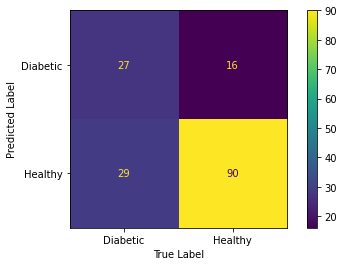

In [169]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,y_val,labels=[1,0]),
                       display_labels=['Diabetic','Healthy']).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [170]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

23-05-2022 12:18:22 Uploading figures


In [171]:
# Feature importance
pipe.get_params()["classifier"].feature_importances_

array([0.15398903, 0.11328751, 0.01101269, 0.55014933, 0.        ,
       0.05391038, 0.        , 0.11765107])

In [172]:
# Get categorical column names
flt_names = pipe.named_steps['full_pipeline'].get_params()["flt_pipeline"][1].get_feature_names_out()
flt_names

['BMI', 'DiabetesPedigreeFunction']

In [173]:
# Get numerical column names
num_names = pipe.named_steps['full_pipeline'].get_params()["num_pipeline"][1].get_feature_names_out()
num_names

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

In [174]:
# merge all column names together
all_names = flt_names + num_names
all_names

['BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age']

In [175]:
# Visualize all classifier plots
# For a complete documentation please see: https://docs.wandb.ai/guides/integrations/scikit
wandb.sklearn.plot_classifier(pipe.get_params()["classifier"],
                              full_pipeline_preprocessing.transform(x_train),
                              full_pipeline_preprocessing.transform(x_val),
                              y_train,
                              y_val,
                              predict,
                              pipe.predict_proba(x_val),
                              [0,1],
                              model_name='DT', feature_names=all_names)

wandb: 
wandb: Plotting DT.


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [176]:
# close the current run before to execute the next section
run.finish()

Acc,0.72222
F1,0.54545
Precision,0.62791
Recall,0.48214


##1.6 Hyperparameter tuning

In [177]:
# global seed
seed = 41

In [178]:
# To see all parameters of a specific step of the pipeline
# pipe.named_steps['classifier'].get_params() #or
# pipe.named_steps['full_pipeline'].get_params()

In [179]:
sweep_config = {
    # try grid or random
    "method": "random",
    "metric": {
        "name": "Accuracy",
        "goal": "maximize"
        },
    "parameters": {
        "criterion": {
            "values": ["gini","entropy"]
            },
        "splitter": {
            "values": ["random","best"]
        },
        "model": {
            "values": [0,1,2]
        },
        "random_state": {
            "values": [seed]
        },
        "max_depth": {
            "values": [4]
        }
    }
}
sweep_id = wandb.sweep(sweep_config, project="diabetes_decision_tree")

Create sweep with ID: vgjbxlkd
Sweep URL: https://wandb.ai/mgoldbarg/diabetes_decision_tree/sweeps/vgjbxlkd


In [180]:
def train():
    with wandb.init() as run:

        # The full pipeline 
        pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                                    ("classifier",DecisionTreeClassifier())
                                    ]
                        )

        # update the parameters of the pipeline that we would like to tuning
        pipe.set_params(**{"full_pipeline__num_pipeline__num_transformer__model": run.config.model})
        pipe.set_params(**{"classifier__criterion": run.config.criterion})
        pipe.set_params(**{"classifier__splitter": run.config.splitter})
        pipe.set_params(**{"classifier__random_state": run.config.random_state})

        # training
        logger.info("Training")
        pipe.fit(x_train, y_train)

        # predict
        logger.info("Infering")
        predict = pipe.predict(x_val)

        # Evaluation Metrics
        logger.info("Evaluation metrics")
        fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
        precision = precision_score(y_val, predict, zero_division=1)
        recall = recall_score(y_val, predict, zero_division=1)
        acc = accuracy_score(y_val, predict)

        logger.info("Accuracy: {}".format(acc))
        logger.info("Precision: {}".format(precision))
        logger.info("Recall: {}".format(recall))
        logger.info("F1: {}".format(fbeta))

        run.summary["Accuracy"] = acc
        run.summary["Precision"] = precision
        run.summary["Recall"] = recall
        run.summary["F1"] = fbeta

In [181]:
wandb.agent(sweep_id, train, count=8)

wandb: Agent Starting Run: ad2adk9n with config:
wandb: 	criterion: entropy
wandb: 	max_depth: 4
wandb: 	model: 1
wandb: 	random_state: 41
wandb: 	splitter: random


23-05-2022 12:21:13 Training
23-05-2022 12:21:13 Infering
23-05-2022 12:21:13 Evaluation metrics
23-05-2022 12:21:13 Accuracy: 0.7160493827160493
23-05-2022 12:21:13 Precision: 0.5961538461538461
23-05-2022 12:21:13 Recall: 0.5535714285714286
23-05-2022 12:21:13 F1: 0.5740740740740741


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.71605
F1,0.57407
Precision,0.59615
Recall,0.55357


wandb: Agent Starting Run: tc29tcct with config:
wandb: 	criterion: gini
wandb: 	max_depth: 4
wandb: 	model: 1
wandb: 	random_state: 41
wandb: 	splitter: best


23-05-2022 12:21:28 Training
23-05-2022 12:21:28 Infering
23-05-2022 12:21:28 Evaluation metrics
23-05-2022 12:21:28 Accuracy: 0.6790123456790124
23-05-2022 12:21:28 Precision: 0.5454545454545454
23-05-2022 12:21:28 Recall: 0.42857142857142855
23-05-2022 12:21:28 F1: 0.4799999999999999


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.67901
F1,0.48
Precision,0.54545
Recall,0.42857


wandb: Agent Starting Run: upy23jkl with config:
wandb: 	criterion: gini
wandb: 	max_depth: 4
wandb: 	model: 1
wandb: 	random_state: 41
wandb: 	splitter: best


23-05-2022 12:21:44 Training
23-05-2022 12:21:44 Infering
23-05-2022 12:21:44 Evaluation metrics
23-05-2022 12:21:44 Accuracy: 0.6790123456790124
23-05-2022 12:21:44 Precision: 0.5454545454545454
23-05-2022 12:21:44 Recall: 0.42857142857142855
23-05-2022 12:21:44 F1: 0.4799999999999999


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.67901
F1,0.48
Precision,0.54545
Recall,0.42857


wandb: Agent Starting Run: 5trvxld4 with config:
wandb: 	criterion: gini
wandb: 	max_depth: 4
wandb: 	model: 1
wandb: 	random_state: 41
wandb: 	splitter: best


23-05-2022 12:21:59 Training
23-05-2022 12:21:59 Infering
23-05-2022 12:21:59 Evaluation metrics
23-05-2022 12:22:00 Accuracy: 0.6790123456790124
23-05-2022 12:22:00 Precision: 0.5454545454545454
23-05-2022 12:22:00 Recall: 0.42857142857142855
23-05-2022 12:22:00 F1: 0.4799999999999999


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.67901
F1,0.48
Precision,0.54545
Recall,0.42857


wandb: Agent Starting Run: mu7idotl with config:
wandb: 	criterion: entropy
wandb: 	max_depth: 4
wandb: 	model: 2
wandb: 	random_state: 41
wandb: 	splitter: best


23-05-2022 12:22:15 Training
23-05-2022 12:22:15 Infering
23-05-2022 12:22:15 Evaluation metrics
23-05-2022 12:22:15 Accuracy: 0.7222222222222222
23-05-2022 12:22:15 Precision: 0.6222222222222222
23-05-2022 12:22:15 Recall: 0.5
23-05-2022 12:22:15 F1: 0.5544554455445545


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.72222
F1,0.55446
Precision,0.62222
Recall,0.5


wandb: Agent Starting Run: 9zcbfhs8 with config:
wandb: 	criterion: gini
wandb: 	max_depth: 4
wandb: 	model: 2
wandb: 	random_state: 41
wandb: 	splitter: best


23-05-2022 12:22:31 Training
23-05-2022 12:22:31 Infering
23-05-2022 12:22:31 Evaluation metrics
23-05-2022 12:22:31 Accuracy: 0.6728395061728395
23-05-2022 12:22:31 Precision: 0.5348837209302325
23-05-2022 12:22:31 Recall: 0.4107142857142857
23-05-2022 12:22:31 F1: 0.46464646464646464


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.67284
F1,0.46465
Precision,0.53488
Recall,0.41071


wandb: Agent Starting Run: 7mxz568k with config:
wandb: 	criterion: entropy
wandb: 	max_depth: 4
wandb: 	model: 0
wandb: 	random_state: 41
wandb: 	splitter: random


23-05-2022 12:22:46 Training
23-05-2022 12:22:46 Infering
23-05-2022 12:22:46 Evaluation metrics
23-05-2022 12:22:46 Accuracy: 0.7160493827160493
23-05-2022 12:22:46 Precision: 0.5961538461538461
23-05-2022 12:22:46 Recall: 0.5535714285714286
23-05-2022 12:22:46 F1: 0.5740740740740741


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.71605
F1,0.57407
Precision,0.59615
Recall,0.55357


wandb: Agent Starting Run: ubyicf2x with config:
wandb: 	criterion: gini
wandb: 	max_depth: 4
wandb: 	model: 1
wandb: 	random_state: 41
wandb: 	splitter: random


23-05-2022 12:23:01 Training
23-05-2022 12:23:01 Infering
23-05-2022 12:23:01 Evaluation metrics
23-05-2022 12:23:01 Accuracy: 0.6419753086419753
23-05-2022 12:23:01 Precision: 0.4791666666666667
23-05-2022 12:23:01 Recall: 0.4107142857142857
23-05-2022 12:23:01 F1: 0.44230769230769235


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


Accuracy,0.64198
F1,0.44231
Precision,0.47917
Recall,0.41071


##1.7 Configure and train the best model

In [183]:
# Note that a new run is yet synced to last sweep run
# Just to check
run = wandb.init()

In [186]:
# The full pipeline 
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         ("classifier",DecisionTreeClassifier())
                         ]
                )

# update the parameters of the pipeline that we would like to tuning
pipe.set_params(**{"full_pipeline__num_pipeline__num_transformer__model": 0})
pipe.set_params(**{"classifier__criterion": 'gini'})
pipe.set_params(**{"classifier__splitter": 'random'})
pipe.set_params(**{"classifier__max_depth": 4})
pipe.set_params(**{"classifier__random_state": 41})



# training
logger.info("Training")
pipe.fit(x_train, y_train)

# predict
logger.info("Infering")
predict = pipe.predict(x_val)

# Evaluation Metrics
logger.info("Evaluation metrics")
fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
precision = precision_score(y_val, predict, zero_division=1)
recall = recall_score(y_val, predict, zero_division=1)
acc = accuracy_score(y_val, predict)

logger.info("Accuracy: {}".format(acc))
logger.info("Precision: {}".format(precision))
logger.info("Recall: {}".format(recall))
logger.info("F1: {}".format(fbeta))

run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta

23-05-2022 12:24:14 Training
23-05-2022 12:24:14 Infering
23-05-2022 12:24:14 Evaluation metrics
23-05-2022 12:24:14 Accuracy: 0.7592592592592593
23-05-2022 12:24:14 Precision: 0.6888888888888889
23-05-2022 12:24:14 Recall: 0.5535714285714286
23-05-2022 12:24:14 F1: 0.6138613861386139


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


In [187]:
# float_names is a list
flt_names = full_pipeline_preprocessing.get_params()["flt_pipeline"][1].get_feature_names_out()
flt_names

['BMI', 'DiabetesPedigreeFunction']

In [188]:
# Get numerical column names
num_names = pipe.named_steps['full_pipeline'].get_params()["num_pipeline"][1].get_feature_names_out()
num_names

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

In [125]:
cat_names = full_pipeline_preprocessing.get_params()["cat_pipeline"][3].get_feature_names_out().tolist()
# num_names is a list

KeyError: ignored

In [189]:
# merge all column names together
all_names = num_names + flt_names
all_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'BMI',
 'DiabetesPedigreeFunction']

In [190]:
# Visualize all classifier plots
# For a complete documentation please see: https://docs.wandb.ai/guides/integrations/scikit
wandb.sklearn.plot_classifier(pipe.get_params()["classifier"],
                              full_pipeline_preprocessing.transform(x_train),
                              full_pipeline_preprocessing.transform(x_val),
                              y_train,
                              y_val,
                              predict,
                              pipe.predict_proba(x_val),
                              [0,1],
                              model_name='BestModel', feature_names=all_names)

wandb: 
wandb: Plotting BestModel.
wandb: Logged feature importances.


Glucose 114
BloodPressure 72
SkinThickness 29
Insulin 127
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29
Glucose 117
BloodPressure 74
SkinThickness 28
Insulin 120
Age 29


wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


##1.8 Export the best model

In [191]:
# types and names of the artifacts
artifact_type = "inference_artifact"
artifact_encoder = "target_encoder"
artifact_model = "model_export"

In [192]:
logger.info("Dumping the artifacts to disk")
# Save the model using joblib
joblib.dump(pipe, artifact_model)

# Save the target encoder using joblib
joblib.dump(le, artifact_encoder)

23-05-2022 12:24:43 Dumping the artifacts to disk


['target_encoder']

In [193]:
# Model artifact
artifact = wandb.Artifact(artifact_model,
                          type=artifact_type,
                          description="A full pipeline composed of a Preprocessing Stage and a Decision Tree model"
                          )

logger.info("Logging model artifact")
artifact.add_file(artifact_model)
run.log_artifact(artifact)

23-05-2022 12:24:47 Logging model artifact


In [194]:
# Target encoder artifact
artifact = wandb.Artifact(artifact_encoder,
                          type=artifact_type,
                          description="The encoder used to encode the target variable"
                          )

logger.info("Logging target enconder artifact")
artifact.add_file(artifact_encoder)
run.log_artifact(artifact)

23-05-2022 12:24:49 Logging target enconder artifact


In [195]:
run.finish()

Acc,0.75926
F1,0.61386
Precision,0.68889
Recall,0.55357
